In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('RB.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,totalwords,totalwords1,comp_name,address,postal_code,city,state,NAICS
0,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw,295,"[""I'll"", 'be', 'the', 'first', 'to', 'admit', ...",La Tavola Italiana,1 Boggs Ave,15211,Pittsburgh,PA,Accommodation and Food Services
1,b2jN2mm9Wf3RcrZCgfo1cg,0,2015-01-18 14:04:18,0,qrffudO73zsslZbe8B9D3Q,2,I was really looking forward to visiting after...,1,sG_h0dIzTKWa3Q6fmb4u-g,263,"['I', 'was', 'really', 'looking', 'forward', '...",Portside,983 Front Ave,44113,Cleveland,OH,Manufacturing
2,mRUVMJkUGxrByzMQ2MuOpA,0,2017-12-15 23:27:08,1,-I5umRTkhw15RqpKMl_o1Q,1,"Walked in around 4 on a Friday afternoon, we s...",0,-mA3-1mN4JIEkqOtdbNXCQ,87,"['Walked', 'in', 'around', '4', 'on', 'a', 'Fr...",Beast of Bourbon Bar & Grill,2235 S Power Rd,85209,Mesa,AZ,Accommodation and Food Services
3,Mem13A3C202RzT53npn4NA,9,2017-05-13 10:41:43,6,IPw8yWiyqnfBzzWmypUHgg,5,If you are looking for the best pierogies in P...,9,5JVY32_bmTBfIGpCCsnAfw,138,"['If', 'you', 'are', 'looking', 'for', 'the', ...",Pierogies Plus,342 Island Ave,15136,McKees Rocks,PA,Accommodation and Food Services
4,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,their pettuccine was fresh-made in the morning...,0,TTRVdTXKcq-xn6-1IWbwEw,33,"['their', 'pettuccine', 'was', 'fresh-made', '...",Casanova,"3377 S Las Vegas Blvd, Ste 2170",89109,Las Vegas,NV,Accommodation and Food Services


### EDA

In [4]:
print('Total Reviews:',len(df.business_id))
print('Total Business:',len(df.business_id.unique()))

Total Reviews: 1247329
Total Business: 18250


In [5]:
df['stars'].value_counts()

5    564777
4    298423
3    143822
1    137792
2    102515
Name: stars, dtype: int64

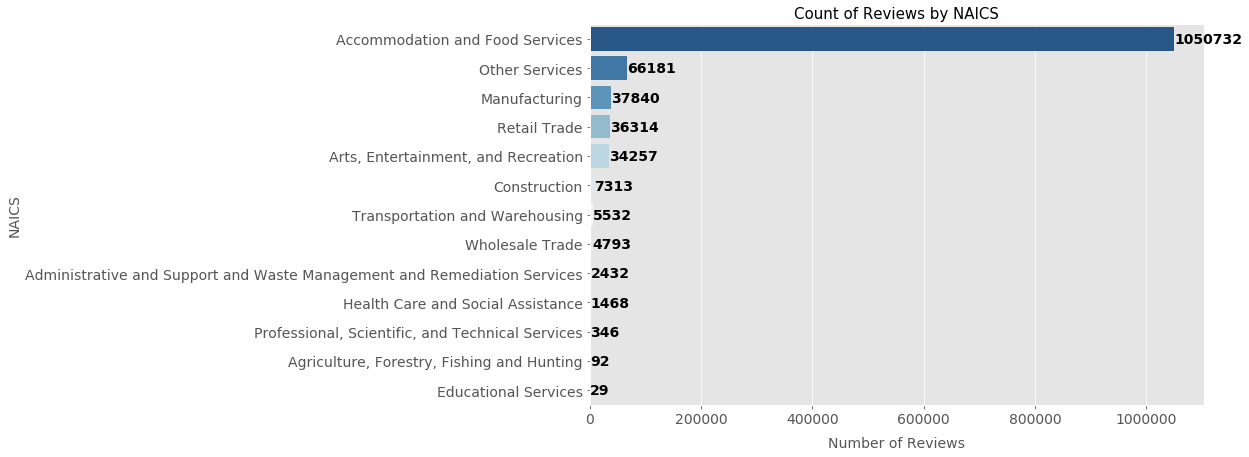

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(11,7))
grouped = df.NAICS.value_counts()
sns.countplot(y='NAICS',data=df, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of Reviews', fontsize=14, labelpad=10)
plt.ylabel('NAICS', fontsize=14)
plt.title('Count of Reviews by NAICS', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df.NAICS.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

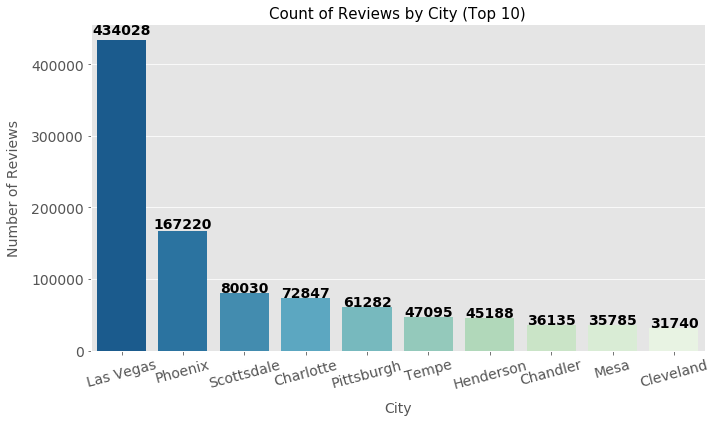

In [8]:
plt.figure(figsize=(11,6))
grouped = df.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of Reviews', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

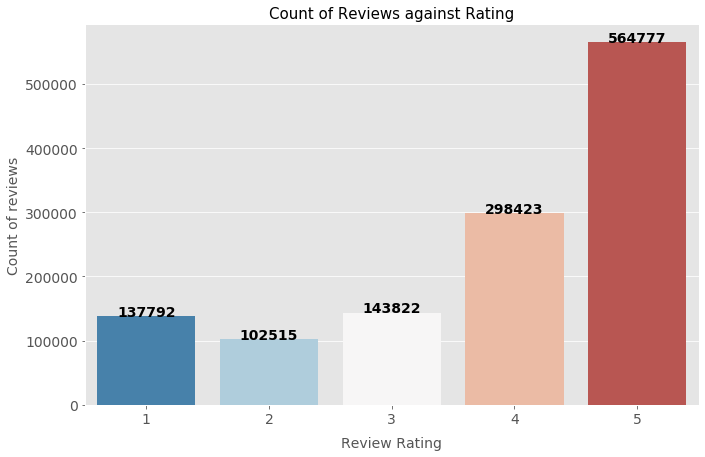

In [9]:
plt.figure(figsize=(11,7))
grouped = df.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [10]:
df['NAICS'].value_counts()

Accommodation and Food Services                                             1050732
Other Services                                                                66181
Manufacturing                                                                 37840
Retail Trade                                                                  36314
Arts, Entertainment, and Recreation                                           34257
Construction                                                                   7313
Transportation and Warehousing                                                 5532
Wholesale Trade                                                                4793
Administrative and Support and Waste Management and Remediation Services       2432
Health Care and Social Assistance                                              1468
Professional, Scientific, and Technical Services                                346
Agriculture, Forestry, Fishing and Hunting                                  

In [55]:
pro = df[(df['NAICS'] == 'Professional, Scientific, and Technical Services') | (df['NAICS'] == 'Construction') |
        (df['NAICS'] == 'Health Care and Social Assistance')]
print('Review Count',len(pro))
pro.tail()

Review Count 9127


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,totalwords,totalwords1,comp_name,address,postal_code,city,state,NAICS
1246932,Djj_iFgBNS5P36AQJgqj3A,0,2012-12-26 19:20:34,0,R6CLWWY706MrLTo5-1bbzA,5,I shopped around looking for the best options ...,0,jKRNapl-AdKjPppvqfQqNw,331,"['I', 'shopped', 'around', 'looking', 'for', '...",Old World Tile & Granite,"7301 E Redfield Rd, Ste 1",85260,Scottsdale,AZ,Construction
1247016,Poei3SGWymfsr03LzJ690g,0,2017-05-22 23:30:55,0,zRXpG8_zNs09VUolFlOgIg,5,I needed my home painted quickly. I contacted ...,2,o9PffflFirjwFX491I-UWw,340,"['I', 'needed', 'my', 'home', 'painted', 'quic...",Extra Mile Painting Company,NaN,85016,Phoenix,AZ,Construction
1247169,ULph523RnW4a3zdm3Bk5Ng,0,2018-04-27 00:30:37,0,nZcxXwXMDaE06Dr6l8L3CA,5,"OK, so I'm using Silver Valley Pool and Spa fo...",1,RdgAPoY4RdPFE5-ze_hFcw,62,"['OK,', 'so', ""I'm"", 'using', 'Silver', 'Valle...",Silver Valley Pool and Spa Repair,"8020 S Rainbow Blvd, Ste 100-533",89139,Las Vegas,NV,Construction
1247225,sfjv2WLHsrLjxwbKxfiWMA,0,2018-11-06 20:27:09,0,gZuBJwX9XKprXJx2T19Osg,5,We had a flood in the motel we were running an...,0,3jYUK4TIaZlybHx4z1WRmg,84,"['We', 'had', 'a', 'flood', 'in', 'the', 'mote...",Wesmor,120 S Pomeroy,85210,Mesa,AZ,Construction
1247282,O0SituHw-BEVQro147pMeg,1,2017-04-29 14:10:23,0,7Gf7Dl-a4NaIcWiCOMsODw,5,I hired this company to update and fix my rent...,2,cW5-sck9MP2A4gcIMVAu2Q,58,"['I', 'hired', 'this', 'company', 'to', 'updat...",Kristo Construction Services,NaN,44134,Parma,OH,Construction


### Sentiment Analyzer

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [57]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [58]:
sentiment_analyzer_scores(pro['text'][1177602])
print('Stars:', pro['stars'][1177602])

In my opinion they are shady and underhanded and I would NOT EVER recommend this law firm to anyone, PERIOD! Once they have your credit card info they will run it whenever they feel like it regardless of whether permission is given or not. The para-legal and the attorneys constantly gave me different answers and to top it off, I had to find another law firm and pay another $3000 retainer because the paralegal stated I was dropped as a client because the attorney that was representing me went to another law firm. And then she proceeded to charge my credit card over $2000 that same day when my invoice wasn't even due yet! (They dropped me so wanted to make sure they got their money!) Christy Thompson later tells me that I was not dropped but chose to leave (which was bull!) ! I am filing complaints with the BBB and the state bar on this. Do yourself a favor and go somewhere else! {'neg': 0.044, 'neu': 0.877, 'pos': 0.078, 'compound': 0.692}
Stars: 1


In [59]:
sentiment_analyzer_scores(pro['text'][1244541])
print('Stars:', pro['stars'][1244541])

**update to his response **
This happened on Oct 2nd and yes Potential customer because that same day I had a 2nd home with a roof leak and had you come here and did the right thing I would have sent you over to that home to give me a quote to repair it.
You absolutely did say, "what do you want me to do about it?" then said "I don't see your name anywhere on here" referring to the original work order when you replaced the roof back in March.  then after I asked about the warranty, since it had been only 7 months, you stated "I didn't transfer anything to you".  That's when you pist me off and ended the call because you obviously were the wrong one to call.  Then maybe 1.5 hours later @ 9:25 am, you text me stating your guy would be by to take a look.  He came, it was NOT raining at the time and he DID remove tiles because I was outside watching him as he stood on the roof.  He confirmed he found a leak, (no where near any pigeon proofing btw) but because of the language barrier he cal

In [60]:
sentiment_analyzer_scores(pro['text'][1244312])
print('Stars:', pro['stars'][1244312])

I contacted Empire based on Yelp reviews and wasn't please with my experience.  I needed new springs (only one was bad but he said to do both) and was given the following price:
$30 Service Charge
$50 Labor Charge
$198 Two Springs
=
$278 for new springs
I gladly paid the mandatory $30 for his time and had another company replace both springs for less than half of their price. {'neg': 0.053, 'neu': 0.882, 'pos': 0.065, 'compound': 0.2069}
Stars: 2


In [61]:
from textblob import TextBlob

In [62]:
print(pro['text'][1244312])
print(TextBlob(pro['text'][1244312]).sentiment)
print('Stars:', pro['stars'][1244312])

I contacted Empire based on Yelp reviews and wasn't please with my experience.  I needed new springs (only one was bad but he said to do both) and was given the following price:
$30 Service Charge
$50 Labor Charge
$198 Two Springs
=
$278 for new springs
I gladly paid the mandatory $30 for his time and had another company replace both springs for less than half of their price.
Sentiment(polarity=-0.03257575757575756, subjectivity=0.48863636363636365)
Stars: 2


In [63]:
print(pro['text'][1244541])
print(TextBlob(pro['text'][1244541]).sentiment)
print('Stars:', pro['stars'][1244541])

**update to his response **
This happened on Oct 2nd and yes Potential customer because that same day I had a 2nd home with a roof leak and had you come here and did the right thing I would have sent you over to that home to give me a quote to repair it.
You absolutely did say, "what do you want me to do about it?" then said "I don't see your name anywhere on here" referring to the original work order when you replaced the roof back in March.  then after I asked about the warranty, since it had been only 7 months, you stated "I didn't transfer anything to you".  That's when you pist me off and ended the call because you obviously were the wrong one to call.  Then maybe 1.5 hours later @ 9:25 am, you text me stating your guy would be by to take a look.  He came, it was NOT raining at the time and he DID remove tiles because I was outside watching him as he stood on the roof.  He confirmed he found a leak, (no where near any pigeon proofing btw) but because of the language barrier he cal

In [64]:
pro2 = pro.copy()
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

pro2['polarity'] = pro2.text.apply(detect_polarity)
pro2.loc[pro2.polarity > 0 , 'class'] =  1
pro2.loc[pro2.polarity < 0, 'class'] =  0
pro2['class'].value_counts()

1.0    8118
0.0     901
Name: class, dtype: int64

In [65]:
pro['stars'].value_counts()

5    6719
1    1502
4     470
2     273
3     163
Name: stars, dtype: int64

In [66]:
pro.loc[pro.stars <= 3 , 'class'] =  0
pro.loc[pro.stars > 3 , 'class'] =  1
pro['class'].value_counts()

1.0    7189
0.0    1938
Name: class, dtype: int64

In [77]:
pro.reset_index(inplace = True)
pro.drop('index', inplace = True, axis = 1)
pro.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,totalwords,totalwords1,comp_name,address,postal_code,city,state,NAICS,class,clean_text
0,6hD6LSXqZ6WiX_p7M2Gy_Q,0,2018-06-08 22:45:06,0,pgywulnFFt2iwOEDO7AH1A,5,Jodi the salesperson design of the layout of t...,1,nrfAv0hyKpRvsL8WD-YcMQ,24,"['Jodi', 'the', 'salesperson', 'design', 'of',...",Triton Garage & Closet Systems,4185 W Clarendon Ave,85019,Phoenix,AZ,Construction,1.0,jodi salesperson design layout cabinets excell...
1,mLg4FenOcHpXZnW67QrVxw,0,2016-08-12 21:26:57,0,JYwPq7v45Aa0g5Zz7Opmag,5,Very impressed. Jim from Dodge plumbing came o...,0,wRL1-4Jdg84qaFHSJ76HRg,100,"['Very', 'impressed.', 'Jim', 'from', 'Dodge',...",Dodge Electric,"1815 W 1st Ave, Ste 119",85202,Mesa,AZ,Construction,1.0,impressed jim dodge plumbing came today presen...
2,Ci5_jgkoNYPjIkvcUQoilA,1,2014-10-11 04:34:40,1,fH3bnm_HA3Kr8JgUZOuSww,5,Services are reasonable priced and they are HO...,1,TFwEPg83Q2w-aDCtdiVrFw,117,"['Services', 'are', 'reasonable', 'priced', 'a...",Colburn Enterprises,"2475 Chandler Ave, Ste 17",89120,Las Vegas,NV,Construction,1.0,services reasonable priced honest try sell us ...
3,83gW66zb2LHNHB_95IhxgQ,0,2016-11-21 19:40:42,0,q82KRw-J_qPfcBuqAW0wOg,5,Kipp and his crew did an amazing job! We had ...,0,8awGPHHntelKcHBFniAHoQ,68,"['Kipp', 'and', 'his', 'crew', 'did', 'an', 'a...",Excellent Floors,6041 Mcleod Dr,89120,Las Vegas,NV,Construction,1.0,kipp crew amazing job flooring house replaced ...
4,Ci5_jgkoNYPjIkvcUQoilA,0,2016-08-04 00:30:02,0,X_BqafQDZa1uO4SZXk4p9w,5,I called Colburn Enterprises after reading all...,0,vdRiibOqFNtw1WmBHElJ1Q,113,"['I', 'called', 'Colburn', 'Enterprises', 'aft...",Colburn Enterprises,"2475 Chandler Ave, Ste 17",89120,Las Vegas,NV,Construction,1.0,called colburn enterprises reading great revie...


In [78]:
pro['text'] = pro['text'].str.replace('\n','')

In [79]:
pro['clean_text'] = pro['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
pro['clean_text'] = pro['clean_text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [80]:
from nltk.corpus import stopwords
import nltk

In [81]:
nltk.download('wordnet')
stop = stopwords.words('english')
stop.extend(['yelp', 'www','biz photo','yelp com biz','www yelp','biz photo','com biz','biz','yr','http','ac'
             ,'au','asu','az','bc','br'])
pro['clean_text'] = pro['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
from textblob import TextBlob, Word

In [84]:
pro['clean_text2'] = pro['clean_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [85]:
pro.loc[61,'clean_text2']

'amazing service couple outlet working owner actually showed troubleshooting found mess ended fixing hour great customer service definitely recommend plus showed time courtesy call thank dodge electric'

In [86]:
train = pro[(pro['NAICS'] == 'Professional, Scientific, and Technical Services') | (pro['NAICS'] == 'Construction')]
test = pro[pro['NAICS'] == 'Health Care and Social Assistance']
test.reset_index(inplace = True)
test.drop('index', inplace = True, axis = 1)

In [87]:
#X_train, X_test, y_train, y_test = train_test_split(pro['text'], pro['class'], random_state=1)
X_train = train['text'].values
y_train = train['class'].values
X_test = test['text'].values
y_test = test['class'].values

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(max_features=5000, analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3))
tfidf_vect_ngram.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=True, vocabulary=None)

In [90]:
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [91]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(xtrain_tfidf_ngram, y_train)
pred = naive_bayes.predict(xvalid_tfidf_ngram)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:', accuracy_score(y_test, pred))
print('Precision score:' , precision_score(y_test, pred))
print('Recall score:', recall_score(y_test, pred))

Accuracy score: 0.8726158038147139
Precision score: 0.861328125
Recall score: 0.9514563106796117


In [93]:
df2 = test[['business_id','comp_name']]
df_pred = pd.DataFrame(pred, columns = ['Pred'])
df3 = pd.concat([df2, df_pred], axis = 1)
df3['Pred'] = df3['Pred'].map({1.0 : 'Postive', 0.0: 'Negative'})
df3.head(20)

,business_id,comp_name,Pred
0,Yi0Y4I-3F0N8wPR74I3Tvg,Envita Medical Center,Postive
1,Yi0Y4I-3F0N8wPR74I3Tvg,Envita Medical Center,Negative
2,Yi0Y4I-3F0N8wPR74I3Tvg,Envita Medical Center,Postive
3,Yi0Y4I-3F0N8wPR74I3Tvg,Envita Medical Center,Postive
4,DE37j9FjAfysF5q7jQ507Q,Mayo Clinic Hospital Cafeteria,Postive
5,xmh5d0ifIgz9k_qe3-Bjdg,Cleveland Clinic -Twinsburg Family Health and ...,Postive
6,q8SeaaT1pI-MZrG_L6MATw,Cleveland Clinic - Fairview Hospital,Negative
7,lic0ngeNGI13VYAavp1LDA,Cleveland Clinic - Hillcrest Hospital,Postive
8,CJZm1-WJFxNI_HE6P-n8Aw,Abrazo Scottsdale Campus,Negative
9,DE37j9FjAfysF5q7jQ507Q,Mayo Clinic Hospital Cafeteria,Postive


In [94]:
group_class = df3.groupby(['business_id','comp_name','Pred']).size().unstack()
score = group_class.fillna(0)
score.head(20)

,Pred,Negative,Postive
business_id,comp_name,,
0ChgHQTokOPZBxV8vxT-bw,HonorHealth Piper Surgery Center,7.0,19.0
1KYXqq47SURtBaGSc5QD1A,UPMC Montefiore,0.0,3.0
2RV0AOIRcAU1Gzv_wDIK9g,White Dove Thrift Shoppe,10.0,20.0
3HocVdwmYf5xZf2bHswbjQ,American Medical Associates,1.0,7.0
49yDCATW6fP8_NO1XN6fsg,"Stephen Fry, MD",7.0,8.0
4aPafOpGTW4AzIAVgZ-fkQ,VA Mike O'Callaghan Federal Hospital,0.0,3.0
6ZEP62AE8vwOtZwuGza02w,Sun City Animal Hospital,19.0,65.0
81R6Uycgr6bzLkhCvFr5BA,UPMC Shadyside Family Health Center,2.0,4.0
B3Og7BX6sBtoqb_oA3fxFg,Metrohealth Broadway Health Center,3.0,1.0


In [95]:
score['NBR_score'] = round(((score['Postive'] - score['Negative']) / (score['Postive'] + score['Negative'])) * 100,2)
score.sort_values(by = ['NBR_score'], inplace = True, ascending= False)
score.head(10)

,Pred,Negative,Postive,NBR_score
business_id,comp_name,,,
DS5TFqkcPiQx6yjUKK8_qg,WomanCare Clinic,0.0,9.0,100.00
sLOuVlFXdefItC3yMJ2ttg,HonorHealth Urgent Care PLUS,0.0,5.0,100.00
1KYXqq47SURtBaGSc5QD1A,UPMC Montefiore,0.0,3.0,100.00
brnHlE2FjKWzu2I8kEYN-A,Sahara Surgery Center,0.0,19.0,100.00
lT2YdPRaNDq4gHFbuIVwEQ,Affinity Surgery Center,0.0,9.0,100.00
U1a-VqprBS-qRmZ2bnKrmA,Banner Health,0.0,3.0,100.00
4aPafOpGTW4AzIAVgZ-fkQ,VA Mike O'Callaghan Federal Hospital,0.0,3.0,100.00
uBJgrN5bgPykDcUMEXEDBQ,HonorHealth Medical Group - West Bell Road - Primary Care,0.0,3.0,100.00
gfeCCBFK1b3SMsb_7dTrOA,Trumed Dispensary,2.0,70.0,94.44


In [96]:
score.tail(10)

,Pred,Negative,Postive,NBR_score
business_id,comp_name,,,
GZBt6PY2VCgxTW-chVcgcw,Cleveland Clinic Richard E. Jacobs Health Center,3.0,4.0,14.29
CJZm1-WJFxNI_HE6P-n8Aw,Abrazo Scottsdale Campus,43.0,54.0,11.34
w3JG46ZYzFrpYuoGLAhiLQ,HonorHealth Medical Group - Paradise Valley - Primary Care,5.0,6.0,9.09
vae0jeU5cEMQJSOKOKaYNQ,Spectra Eye Institute,6.0,7.0,7.69
49yDCATW6fP8_NO1XN6fsg,"Stephen Fry, MD",7.0,8.0,6.67
nSPh4_BKX3Fch0TOahe-vQ,Good Night Pediatrics Henderson,40.0,44.0,4.76
j0K_tuCeXVpjq6caSlkMIw,AllKids Urgent Care,16.0,17.0,3.03
C7jblQ3LBs6d8rJP0foMsA,HonorHealth Medical Group - Arcadia - Primary Care,5.0,5.0,0.00
IfXFqP5ER_sfU_TL_0nKAw,William S Middleton Memorial Veterans Hospital,2.0,2.0,0.00


In [97]:
print('NAICS Code Health Care')
print('Mean:' ,score.NBR_score.mean())
print('Median:', score.NBR_score.median())
print('Standard Deviation:', score.NBR_score.std())

NAICS Code Health Care
Mean: 44.40285714285715
Median: 35.34
Standard Deviation: 32.72423386463996


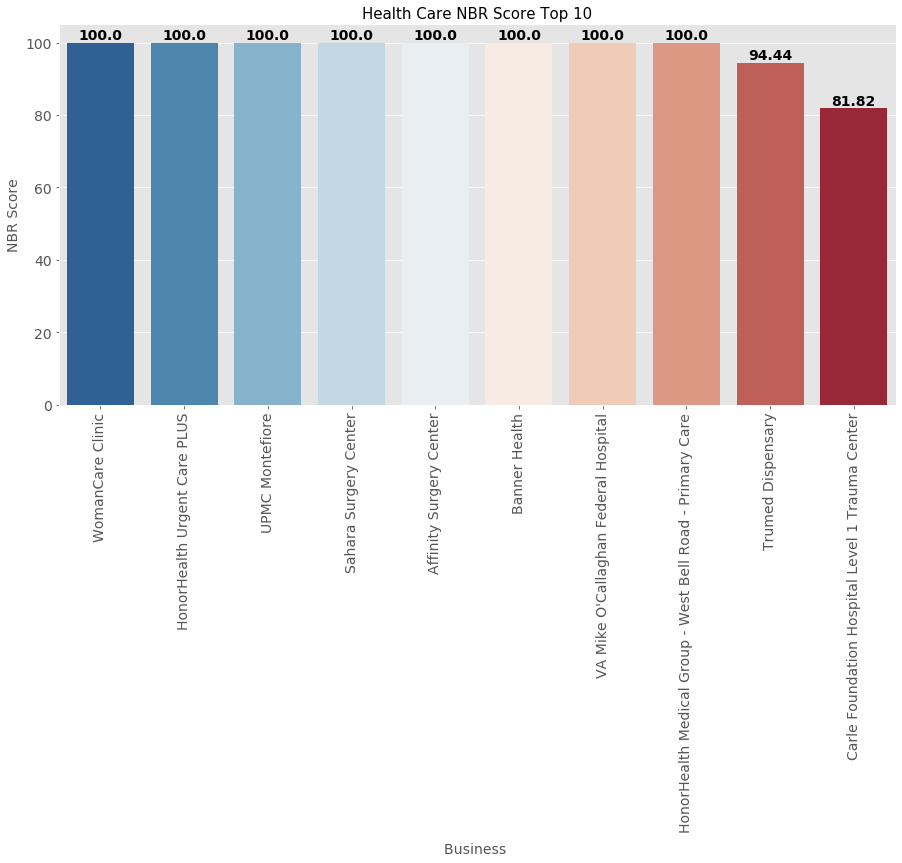

In [98]:
df10 = score.reset_index()
df10.drop('business_id', inplace = True, axis = 1)
df10 = df10.head(10)
plt.figure(figsize=(15,7))
sns.barplot(df10.comp_name, df10.NBR_score, palette=sns.color_palette("RdBu_r", len(df10)))
plt.xlabel('Business ', labelpad=10, fontsize=14)
plt.ylabel('NBR Score', fontsize=14)
plt.title('Health Care NBR Score Top 10', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
y = list(df10.NBR_score)
for  i, v in enumerate(y):
    plt.text(i, v*1.01, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

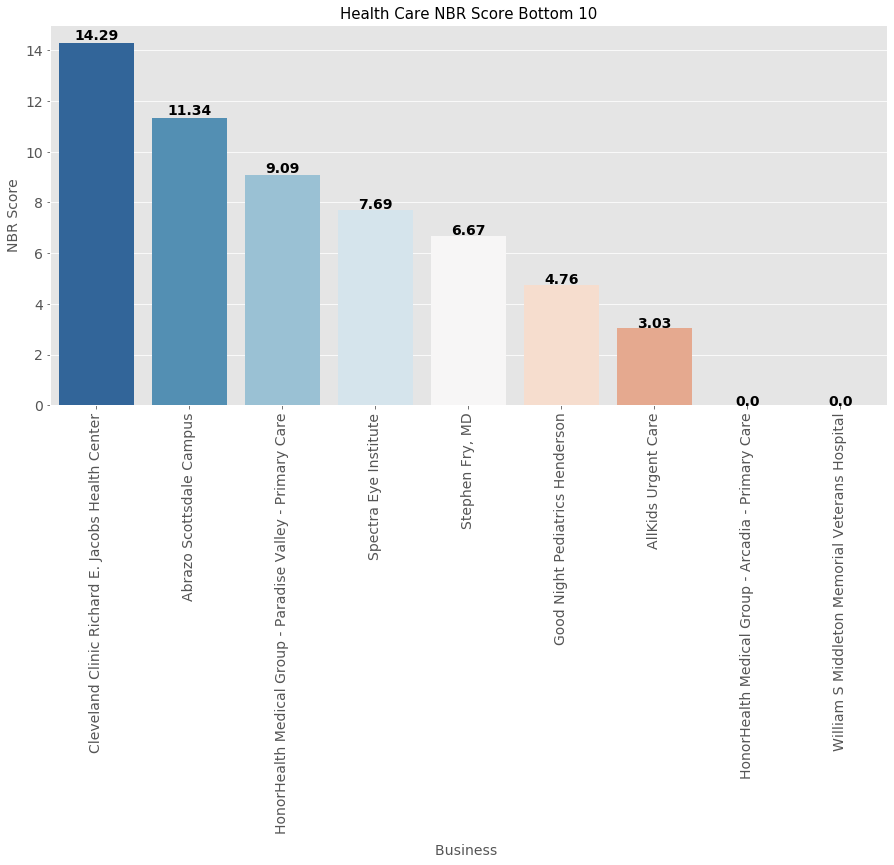

In [99]:
df10 = score.reset_index()
df10.drop('business_id', inplace = True, axis = 1)
df10 = df10.tail(10)[:9]
plt.figure(figsize=(15,7))
sns.barplot(df10.comp_name, df10.NBR_score, palette=sns.color_palette("RdBu_r", len(df10)))
plt.xlabel('Business ', labelpad=10, fontsize=14)
plt.ylabel('NBR Score', fontsize=14)
plt.title('Health Care NBR Score Bottom 10', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
y = list(df10.NBR_score)
for  i, v in enumerate(y):
    plt.text(i, v*1.01, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)